# Cluster Analysis in Python

# Management and Preparation

## Import Packages

In [54]:
# For Structure
import os
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image

## Create Directory Structure

In [2]:
def create_directory(path):
    if not os.path.exists(path):
        os.mkdir(path)
    else:
        print(path + ' already exists!')

In [3]:
create_directory('fig')
create_directory('dataset')
create_directory('dataset/input')
create_directory('dataset/input/original')
create_directory('dataset/output')

fig already exists!
dataset already exists!
dataset/input already exists!
dataset/input/original already exists!
dataset/output already exists!


## Import Datasets

# Hierarchical Clustering

In [31]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

## Pokemon Sightings

In [40]:
# Coordinate of pokemon sightings
# X Coordinate
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
# y Coordinate
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
# Create a dataframe
df = pd.DataFrame({
    'x': x,
    'y': y
})

In [19]:
len(x)

20

In [15]:
# Use the linkage() function to compute distance
Z = linkage(df, 'ward',)
Z

array([[10.        , 13.        ,  0.        ,  2.        ],
       [15.        , 19.        ,  0.        ,  2.        ],
       [ 1.        ,  5.        ,  1.        ,  2.        ],
       [ 2.        ,  6.        ,  1.        ,  2.        ],
       [20.        , 21.        ,  1.41421356,  4.        ],
       [ 3.        ,  8.        ,  2.        ,  2.        ],
       [14.        , 17.        ,  2.23606798,  2.        ],
       [12.        , 24.        ,  2.60768096,  5.        ],
       [11.        , 16.        ,  3.        ,  2.        ],
       [ 9.        , 22.        ,  3.51188458,  3.        ],
       [ 0.        ,  7.        ,  3.60555128,  2.        ],
       [26.        , 27.        ,  5.59846918,  7.        ],
       [23.        , 25.        ,  5.70087713,  4.        ],
       [18.        , 28.        ,  6.45497224,  3.        ],
       [ 4.        , 29.        ,  7.85281266,  4.        ],
       [30.        , 32.        ,  9.5306523 ,  6.        ],
       [31.        , 33.

(n-1) by 4 matrix Z is returned

In [29]:
# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')
df.head()

,x,y,cluster_labels
0,9,8,2
1,6,4,2
2,2,10,2
3,3,6,2
4,1,0,2


## Visualizing Clustering

### Cluster by Coordinate

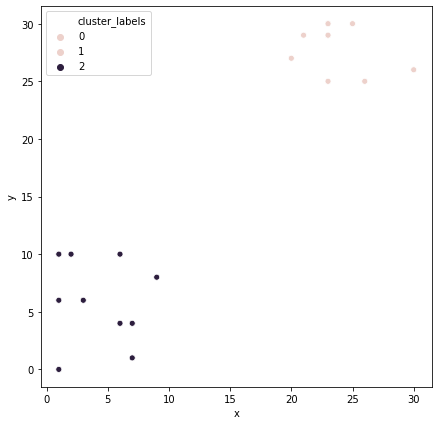

In [30]:
# Plot the points with seaborn
plt.figure(figsize=(7,7))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Dendrogram

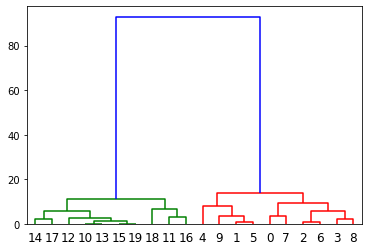

In [33]:
dendrogram(Z)
plt.show()

# K-Means Clustering

In [34]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

Originally df contains integer coordinate values. However, the kmeans functions requires the type to be float. So we will need to convert df first:

In [46]:
df = df[['x','y']].astype(float)

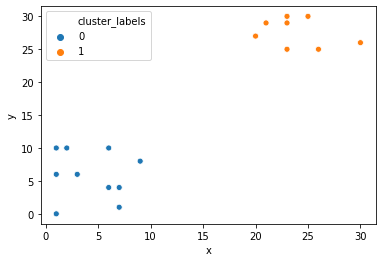

In [49]:
# Compute cluster centers
centroids,_ = kmeans(df, 2,)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

# Data Prep for Clustering

Reasons for this data prep:

* Incomparable units
* Vastly different variances and scales

Solution:
* Normalization of data

## Normalization

In [58]:
# Import the whiten function
from scipy.cluster.vq import whiten

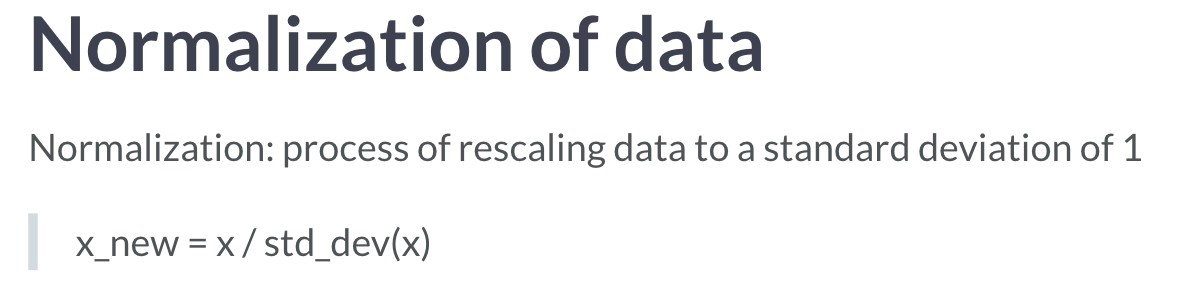

In [57]:
Image("fig/illustration/normalization.png")

In [59]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


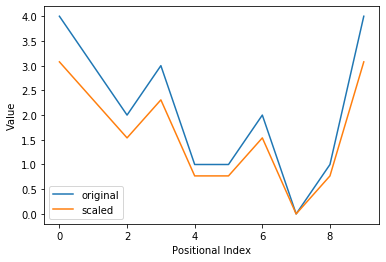

In [63]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.ylabel("Value")
plt.xlabel("Positional Index")

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

Observation:

* Scaled value has less variation than the original values